In [7]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import seaborn as sns

In [8]:
def raincloud(lst_a, lst_b):
    data_x = [lst_a, lst_b]

    fig, ax = plt.subplots(figsize=(16, 8))

    # Create a list of colors for the boxplots based on the number of features you have
    boxplots_colors = ['tab:green', 'tab:green']
    #boxplots_colors = ['yellowgreen', 'olivedrab']

    # Boxplot data
    bp = ax.boxplot(data_x, patch_artist = True, vert = False)

    # Change to the desired color and add transparency
    for patch, color in zip(bp['boxes'], boxplots_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)

    # Create a list of colors for the violin plots based on the number of features you have
    violin_colors = ['tab:blue', 'tab:orange']
    # violin_colors = ['thistle', 'orchid']

    # Violinplot data
    vp = ax.violinplot(data_x, points=500, 
                showmeans=False, showextrema=False, showmedians=False, vert=False)

    for idx, b in enumerate(vp['bodies']):
        # Get the center of the plot
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # Modify it so we only see the upper half of the violin plot
        b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
        # Change to the desired color
        b.set_color(violin_colors[idx])

    # Create a list of colors for the scatter plots based on the number of features you have
    scatter_colors = ['tab:blue', 'tab:orange']

    # Scatterplot data
    for idx, features in enumerate(data_x):
        # Add jitter effect so the features do not overlap on the y-axis
        y = np.full(len(features), idx + .8)
        idxs = np.arange(len(y))
        out = y.astype(float)
        out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
        y = out
        plt.scatter(features, y, s=5, c=scatter_colors[idx])

    plt.yticks(np.arange(1,3,1), ['MoLPC', 'MoLPC-IMP'])  # Set text labels.
    plt.xlabel('tmscore')
    plt.title("MoLPC-IMP vs MoLPC")
    plt.show()

## Dataset

In [9]:
meta = pd.read_csv('stochiometry.csv')
imp = pd.read_csv('mmalign_imp.csv')
molpc = pd.read_csv('mmalign_molpc.csv')
mcts_v2 = pd.read_csv('mmalign_mcts_v2.csv')
mcts_v2_2 = pd.read_csv('mmalign_mcts_v2.2.csv')
af = pd.read_csv('mmalign_af.csv')

In [10]:
meta["symmetry type"].unique()
meta['symmetry type'].value_counts()

dihedral       71
cyclic         49
asymmetric     25
tetrahedral    21
octahedral      6
helical         3
Name: symmetry type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0a2a6f9850>,
 [Text(0.3210843119486148, 1.0520954636440958, 'dihedral'),
  Text(-1.0549351234000535, -0.31162779949310415, 'cyclic'),
  Text(0.04935125900310955, -1.0988923756377638, 'asymmetric'),
  Text(0.8412368268029411, -0.7087457945064074, 'tetrahedral'),
  Text(1.0745745384001106, -0.23513732460455797, 'octahedral'),
  Text(1.0984051318538888, -0.05921288978796486, 'helical')])

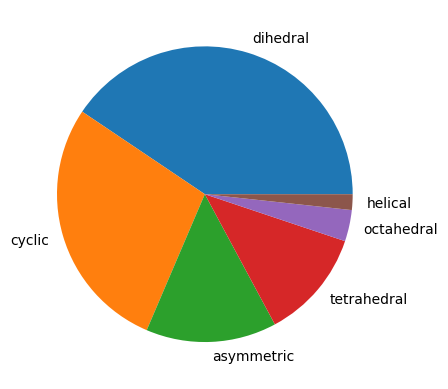

In [11]:
'''
dihedral       71
cyclic         49
asymmetric     25
tetrahedral    21
octahedral      6
helical         3
'''

labels = 'dihedral', 'cyclic', 'asymmetric', 'tetrahedral', 'octahedral', 'helical'
sizes = [71, 49, 25, 21, 6, 3]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

## MoLPC-imp

In [42]:
meta = pd.merge(meta, imp, how='outer', on='id')
meta = pd.merge(meta, molpc, how='outer', on='id')
meta = pd.merge(meta, mcts_v2, how='outer', on='id')
meta = pd.merge(meta, mcts_v2_2, how='outer', on='id')
meta = pd.merge(meta, af, how='outer', on='id')

In [43]:
meta

,id,no. of individual chains,no. of chains,global symmetry,symmetry type,stochiometry,tm_imp,tm_molpc,tm_mcts_v2,tm_mcts_v2.2,tm_af
0,1A8R,1,10,D5,dihedral,A10,0.1753,0.3327,0.1645,0.3350,0.2412
1,1AVO,2,14,C7,cyclic,A7B7,0.3593,0.9224,0.4159,0.7266,0.9990
2,1BCF,1,24,O,octahedral,A24,0.1646,0.1640,0.1616,0.1616,0.7446
3,1BHC,1,10,D5,dihedral,A10,0.1427,0.1442,0.1664,0.1611,0.3346
4,1D0I,1,12,T,tetrahedral,A12,0.2475,0.2502,0.2504,0.2504,0.9974
...,...,...,...,...,...,...,...,...,...,...,...
170,7JJP,1,12,D6,dihedral,A12,NaN,0.4338,0.5480,NaN,NaN
171,7JKC,1,12,D6,dihedral,A12,NaN,0.4201,0.2428,NaN,NaN
172,7JQZ,1,10,D5,dihedral,A10,0.4936,0.5085,0.9542,0.9776,0.7676
173,7JZ2,4,12,C3,cyclic,A3B3C3D3,0.3529,0.3780,0.1949,0.3521,0.9925


In [5]:
meta2 = meta.dropna(subset=['tm_mcts_v2'])

dihe = meta2[meta2['symmetry type'] == 'dihedral']
cycl = meta2[meta2['symmetry type'] == 'cyclic']
asym = meta2[meta2['symmetry type'] == 'asymmetric']
tetr = meta2[meta2['symmetry type'] == 'tetrahedral']
octa = meta2[meta2['symmetry type'] == 'octahedral']
heli = meta2[meta2['symmetry type'] == 'helical']

KeyError: ['tm_mcts_v2']

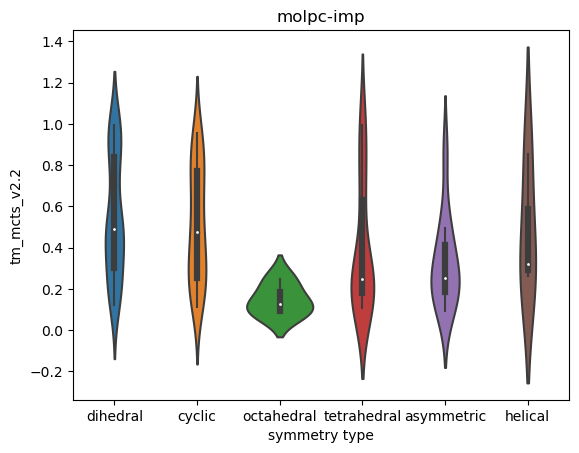

In [44]:
vp = sns.violinplot(data=meta, x='symmetry type', y='tm_mcts_v2.2').set(title='molpc-imp')

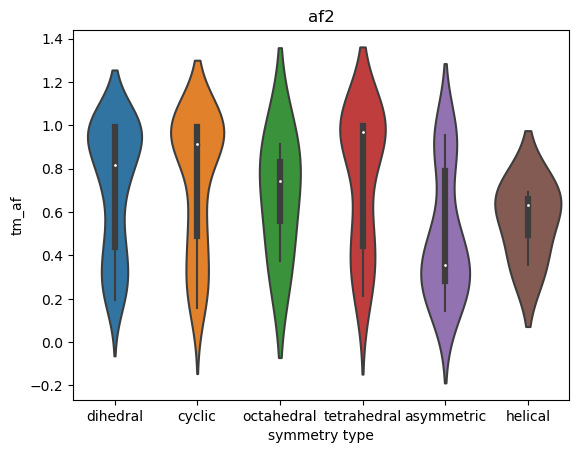

In [27]:
vp = sns.violinplot(data=meta, x='symmetry type', y='tm_af').set(title='af2')

## Rain Cloud plot

In [14]:
imp_tmscores = imp['tm_imp'].to_list()
molpc_tmscores = molpc['tm_molpc'].to_list()
mcts_tmscores = mcts_v2['tm_mcts_v2'].to_list()
mcts2_tmscores = mcts_v2_2['tm_mcts_v2.2'].to_list()
af_tmscores = af['tm_af'].to_list()

In [17]:
comb = pd.merge(molpc, mcts_v2_2, on='id', how='outer')
comb = pd.merge(comb, af, on='id', how='outer')
comb2 = comb.dropna()
comb2

,id,tm_molpc,tm_mcts_v2.2,tm_af
1,6UIW,0.6108,0.7863,0.9309
2,5K2M,0.4918,0.4934,0.4844
3,1G63,0.2510,0.2518,0.9949
4,3ZIA,0.5011,0.8432,0.6508
5,2P1B,0.4917,0.4924,0.4351
...,...,...,...,...
159,2DD4,0.5106,0.4699,0.9968
160,5CW7,0.3677,0.2023,0.8870
161,3K6C,0.8869,0.9732,0.9947
166,5ODC,0.8024,0.7383,0.9841


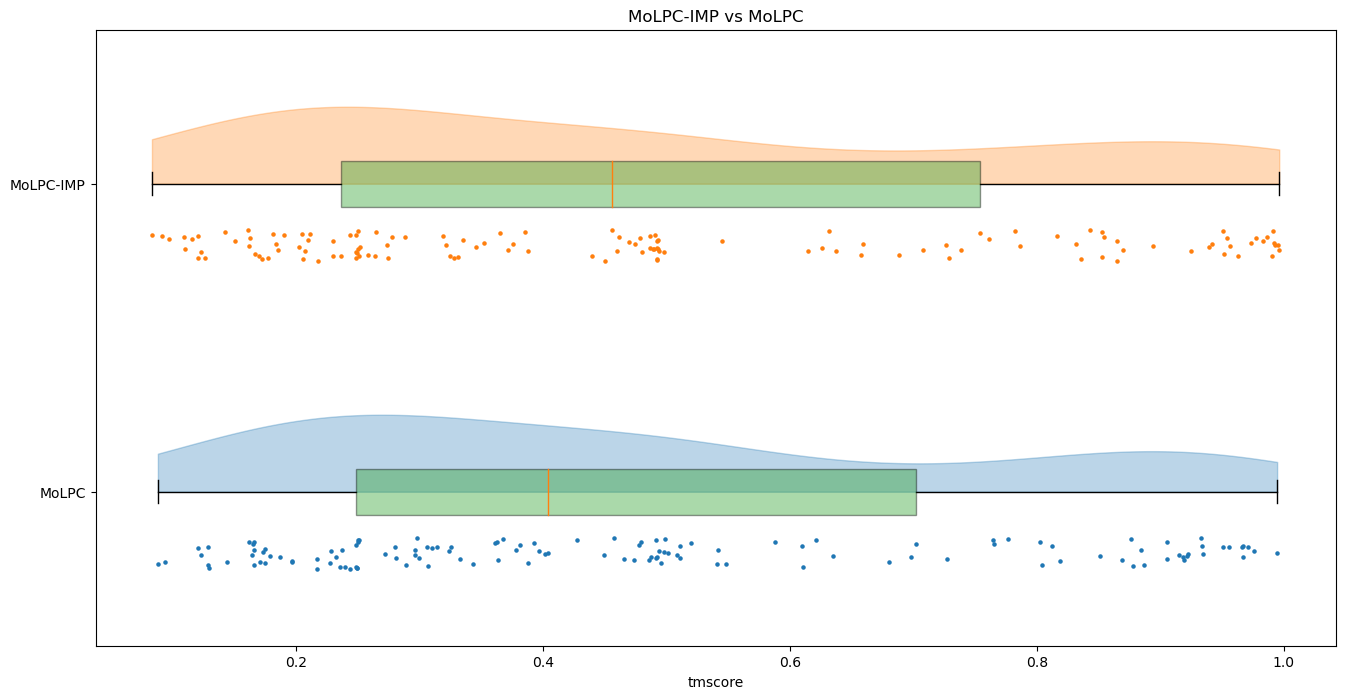

In [18]:
raincloud(comb2['1_x'].to_list(), comb2['1_y'].to_list())

## Correlation

Text(0, 0.5, 'AF')

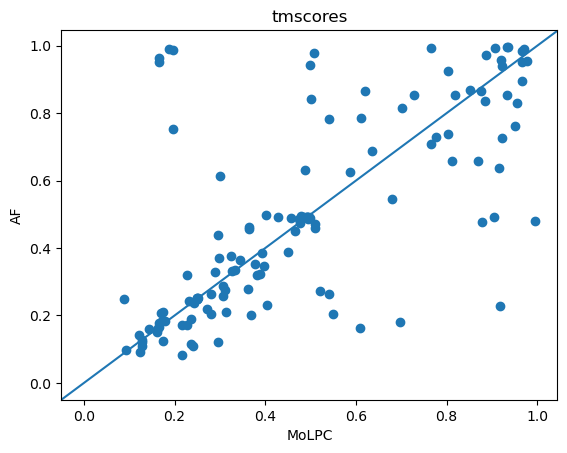

In [19]:
plt.scatter(comb2['1_x'].to_list(), comb2['1_y'].to_list())
plt.axline((0, 0), slope=1)
plt.title("tmscores")
plt.xlabel('MoLPC')
plt.ylabel('AF')

In [24]:
comb2.to_csv('af_tmscores.csv', index=False)

In [25]:
df = pd.read_csv('af_tmscores.csv')
df

,0,1_x,1_y
0,6UIW,0.6108,0.9309
1,5K2M,0.4918,0.4844
2,1G63,0.2510,0.9949
3,3ZIA,0.5011,0.6508
4,2P1B,0.4917,0.4351
...,...,...,...
130,3K6C,0.8869,0.9947
131,1L0L,0.3168,0.9557
132,6MRT,0.1869,0.6231
133,5ODC,0.8024,0.9841


In [30]:
df = df.drop(df.columns[[0]], axis=1)

In [27]:
df.sort_values(by='0').to_csv('tmscores.csv', index=None)
df

,0,1_x,1_y
0,6UIW,0.6108,0.9309
1,5K2M,0.4918,0.4844
2,1G63,0.2510,0.9949
3,3ZIA,0.5011,0.6508
4,2P1B,0.4917,0.4351
...,...,...,...
130,3K6C,0.8869,0.9947
131,1L0L,0.3168,0.9557
132,6MRT,0.1869,0.6231
133,5ODC,0.8024,0.9841


In [30]:
df['diff'] = df['1_y'] - df['1_x']
df

,0,1_x,1_y,diff
0,6UIW,0.6108,0.9309,0.3201
1,5K2M,0.4918,0.4844,-0.0074
2,1G63,0.2510,0.9949,0.7439
3,3ZIA,0.5011,0.6508,0.1497
4,2P1B,0.4917,0.4351,-0.0566
...,...,...,...,...
130,3K6C,0.8869,0.9947,0.1078
131,1L0L,0.3168,0.9557,0.6389
132,6MRT,0.1869,0.6231,0.4362
133,5ODC,0.8024,0.9841,0.1817


In [38]:
df = df.sort_values(by='diff')
df.to_csv('af-molpc_diff.csv', index=False)

In [18]:
comb2

,id,tm_molpc,tm_mcts_v2.2,tm_af
1,6UIW,0.6108,0.7863,0.9309
2,5K2M,0.4918,0.4934,0.4844
3,1G63,0.2510,0.2518,0.9949
4,3ZIA,0.5011,0.8432,0.6508
5,2P1B,0.4917,0.4924,0.4351
...,...,...,...,...
159,2DD4,0.5106,0.4699,0.9968
160,5CW7,0.3677,0.2023,0.8870
161,3K6C,0.8869,0.9732,0.9947
166,5ODC,0.8024,0.7383,0.9841


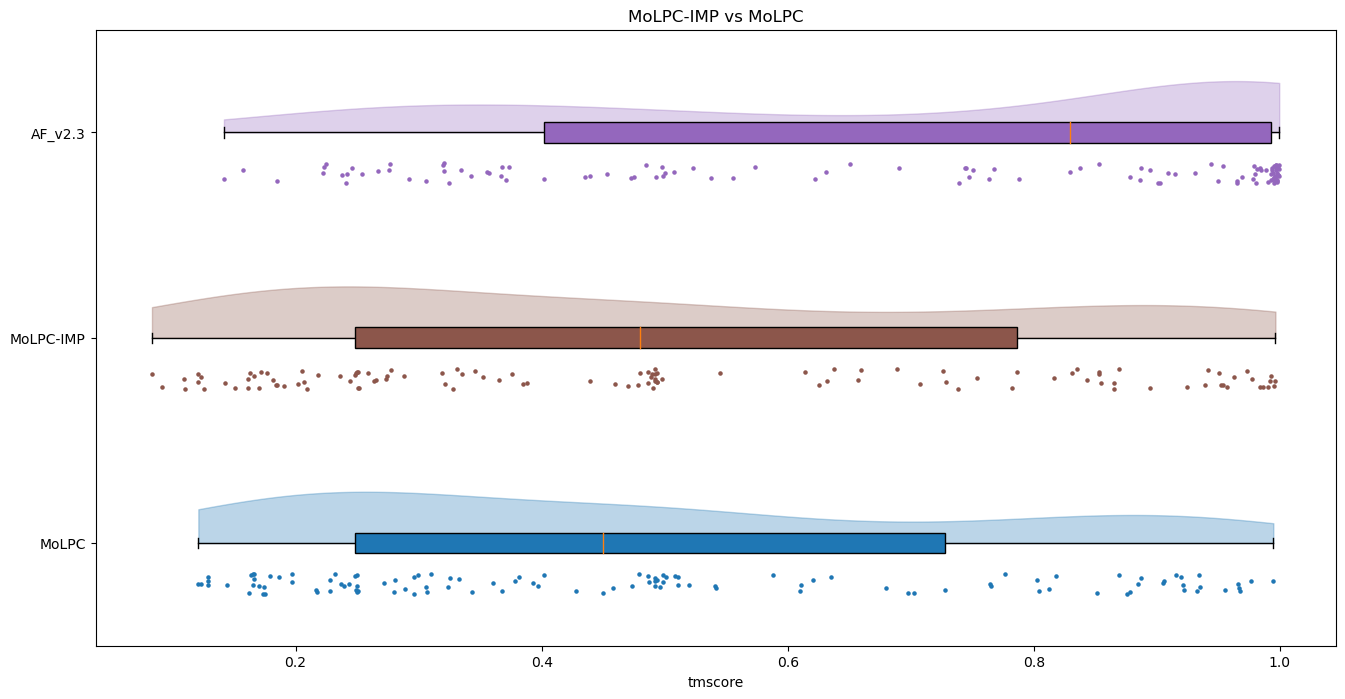

In [35]:
data_x = [comb2['tm_molpc'].to_list(), comb2['tm_mcts_v2.2'].to_list(), comb2['tm_af'].to_list()]

fig, ax = plt.subplots(figsize=(16, 8))
# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['tab:blue', 'tab:brown', 'tab:purple']
#boxplots_colors = ['yellowgreen', 'olivedrab']
# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False, widths=0.1)
# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    plt.setp(bp['means'], color='k')
    patch.set_alpha(1)
# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['tab:blue', 'tab:brown', 'tab:purple']
# violin_colors = ['thistle', 'orchid']
# Violinplot data
vp = ax.violinplot(data_x, points=500, 
            showmeans=False, showextrema=False, showmedians=False, vert=False)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])
# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tab:blue', 'tab:brown', 'tab:purple']
# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=scatter_colors[idx])
plt.yticks(np.arange(1,4,1), ['MoLPC', 'MoLPC-IMP', 'AF_v2.3'])  # Set text labels.
plt.xlabel('tmscore')
plt.title("MoLPC-IMP vs MoLPC")
plt.show()